# 사전 구축된 에이전트 사용

자세한 내용은 [Start with a prebuilt agent](https://langchain-ai.github.io/langgraph/agents/agents/) 페이지를 참조

## 1. 환경설정

In [1]:
# 환경 변수 확인
from dotenv import load_dotenv
import os
load_dotenv(override=True)

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")

print(os.environ.get("OPENAI_API_KEY")[:20])
print(os.environ.get("TAVILY_API_KEY")[:20])


sk-proj-8xZc3Ppf7BtK
tvly-dev-GUT1o6jP4Og


## 2. 기본 에이전트 생성

### 사용자 도구 정의

In [2]:
from langchain_core.tools import tool

@tool
def get_weather(city: str) -> str:  
    """주어진 도시의 날씨를 확인합니다."""
    return f"{city}의 날씨는 항상 화창합니다!"

### 에이전트 생성

In [13]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini", temperature=0)
agent = create_react_agent(
    model="openai:gpt-4o-mini",  
    tools=[get_weather],  
    prompt="당신은 유용한 AI 도우미입니다."  
)

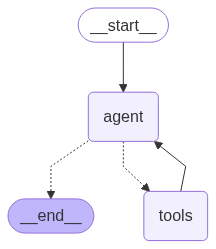

In [14]:
from IPython.display import Image, display

try:
    display(Image(agent.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [15]:
# Run the agent
response = agent.invoke(
    {"messages": [{"role": "user", "content": "서울의 날씨는 어떤가?"}]}
)

response["messages"][-1].content

'서울의 날씨는 항상 화창합니다!'

## 3. 구조화 된 출력

In [16]:
from pydantic import BaseModel
from langgraph.prebuilt import create_react_agent

class WeatherResponse(BaseModel):
    conditions: str

# model = ChatOpenAI(model="gpt-4o-mini", temperature=0)
agent = create_react_agent(
    model="openai:gpt-4o-mini",
    tools=[get_weather],
    response_format=WeatherResponse 
)

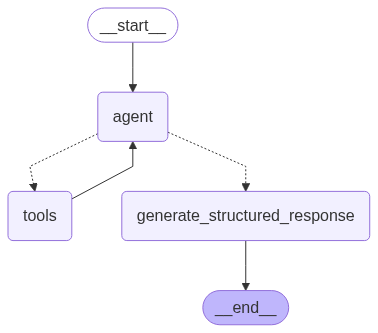

In [17]:
from IPython.display import Image, display

try:
    display(Image(agent.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [18]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "서울의 날씨는 어떤가?"}]}
)

# response["structured_response"]
response

{'messages': [HumanMessage(content='서울의 날씨는 어떤가?', additional_kwargs={}, response_metadata={}, id='82c457af-d4a0-43c1-ab44-8176ef1c5bf9'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_hgFfAulmRAjdBAGUAak2OPvY', 'function': {'arguments': '{"city":"서울"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 55, 'total_tokens': 69, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_62a23a81ef', 'id': 'chatcmpl-BqZhl1FpMcF9wOAQsd9zFL5a6b5j3', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0546bb26-247d-4b48-8d84-8bb27693e678-0', tool_calls=[{'name': 'get_weather', 'args': {'city': '서울'}, 'id': 'call_hgFfAulmRAjdBAGUAak2OPv